In [65]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df=pd.read_csv("/content/sample_data/spam.csv")
df.head(10)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [67]:
df.shape

(5572, 2)

In [68]:
df.isnull().sum()


Label        0
EmailText    0
dtype: int64

In [69]:
df['EmailText'].nunique()

5169

In [70]:
df.drop_duplicates(subset="EmailText",inplace=True)

In [71]:
df.shape

(5169, 2)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5169 non-null   object
 1   EmailText  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [73]:
df.describe()

,Label,EmailText
count,5169,5169
unique,2,5169
top,ham,December only! Had your mobile 11mths+? You ar...
freq,4516,1


In [74]:
def num(df):
    if(df['Label']=="spam"):
      return 1
    else:
      return 0

df['spam'] = df.apply(num, axis=1)

In [75]:
df.head()

,Label,EmailText,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


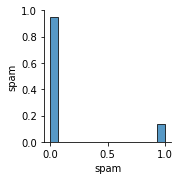

In [76]:
sns.pairplot(df)

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def identify_tokens(df):
    Email = df['EmailText']
    tokens = nltk.word_tokenize(Email)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['Email'] = df.apply(identify_tokens, axis=1)
df

,Label,EmailText,spam,Email
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[Go, until, jurong, point, Available, only, in..."
1,ham,Ok lar... Joking wif u oni...,0,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[Free, entry, in, a, wkly, comp, to, win, FA, ..."
3,ham,U dun say so early hor... U c already then say...,0,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[Nah, I, do, think, he, goes, to, usf, he, liv..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,"[This, is, the, time, we, have, tried, contact..."
5568,ham,Will Ã_ b going to esplanade fr home?,0,"[Will, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"[Pity, was, in, mood, for, that, So, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,0,"[The, guy, did, some, bitching, but, I, acted,..."


In [80]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['Email']
    stop_words = [w for w in my_list if not w in stops]
    return (stop_words)

df['email_s'] = df.apply(remove_stops, axis=1)
df

,Label,EmailText,spam,Email,email_s
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[Go, until, jurong, point, Available, only, in...","[Go, jurong, point, Available, bugis, n, great..."
1,ham,Ok lar... Joking wif u oni...,0,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[Free, entry, in, a, wkly, comp, to, win, FA, ...","[Free, entry, wkly, comp, win, FA, Cup, final,..."
3,ham,U dun say so early hor... U c already then say...,0,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[Nah, I, do, think, he, goes, to, usf, he, liv...","[Nah, I, think, goes, usf, lives, around, though]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,"[This, is, the, time, we, have, tried, contact...","[This, time, tried, contact, U, Pound, prize, ..."
5568,ham,Will Ã_ b going to esplanade fr home?,0,"[Will, b, going, to, esplanade, fr, home]","[Will, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"[Pity, was, in, mood, for, that, So, any, othe...","[Pity, mood, So, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,0,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, intereste..."


In [82]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [81]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemma(df):
    lw=[]
    lemmatizer = WordNetLemmatizer()
    my_lemma = df['email_s']
    pos_words = [nltk.pos_tag(my_lemma)]
    for words in pos_words:
      for w in words:
        lw.append(lemmatizer.lemmatize(w[0],get_wordnet_pos(w[1])))

    return lw

df['email_lemma'] = df.apply(lemma, axis=1)
df

,Label,EmailText,spam,Email,email_s,email_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[Go, until, jurong, point, Available, only, in...","[Go, jurong, point, Available, bugis, n, great...","[Go, jurong, point, Available, bugis, n, great..."
1,ham,Ok lar... Joking wif u oni...,0,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[Free, entry, in, a, wkly, comp, to, win, FA, ...","[Free, entry, wkly, comp, win, FA, Cup, final,...","[Free, entry, wkly, comp, win, FA, Cup, final,..."
3,ham,U dun say so early hor... U c already then say...,0,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[Nah, I, do, think, he, goes, to, usf, he, liv...","[Nah, I, think, goes, usf, lives, around, though]","[Nah, I, think, go, usf, life, around, though]"
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,"[This, is, the, time, we, have, tried, contact...","[This, time, tried, contact, U, Pound, prize, ...","[This, time, try, contact, U, Pound, prize, cl..."
5568,ham,Will Ã_ b going to esplanade fr home?,0,"[Will, b, going, to, esplanade, fr, home]","[Will, b, going, esplanade, fr, home]","[Will, b, go, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"[Pity, was, in, mood, for, that, So, any, othe...","[Pity, mood, So, suggestions]","[Pity, mood, So, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,0,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, intereste...","[The, guy, bitch, I, act, like, interested, bu..."


In [85]:
column_drop=['Label','EmailText','Email','email_s']
df.drop(column_drop,inplace=True,axis=1)
df

,spam,email_lemma
0,0,"[Go, jurong, point, Available, bugis, n, great..."
1,0,"[Ok, lar, Joking, wif, u, oni]"
2,1,"[Free, entry, wkly, comp, win, FA, Cup, final,..."
3,0,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"[Nah, I, think, go, usf, life, around, though]"
...,...,...
5567,1,"[This, time, try, contact, U, Pound, prize, cl..."
5568,0,"[Will, b, go, esplanade, fr, home]"
5569,0,"[Pity, mood, So, suggestion]"
5570,0,"[The, guy, bitch, I, act, like, interested, bu..."


In [86]:
df.rename({'email_lemma':'Email'},axis=1,inplace=True)
df

,spam,Email
0,0,"[Go, jurong, point, Available, bugis, n, great..."
1,0,"[Ok, lar, Joking, wif, u, oni]"
2,1,"[Free, entry, wkly, comp, win, FA, Cup, final,..."
3,0,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"[Nah, I, think, go, usf, life, around, though]"
...,...,...
5567,1,"[This, time, try, contact, U, Pound, prize, cl..."
5568,0,"[Will, b, go, esplanade, fr, home]"
5569,0,"[Pity, mood, So, suggestion]"
5570,0,"[The, guy, bitch, I, act, like, interested, bu..."


In [87]:
def join_words(df):
    my_list = df['Email']
    rejoin = ( " ".join(my_list))
    return rejoin

df['email'] = df.apply(join_words, axis=1)

In [88]:
df.drop('Email',axis=1,inplace=True)
df

,spam,email
0,0,Go jurong point Available bugis n great world ...
1,0,Ok lar Joking wif u oni
2,1,Free entry wkly comp win FA Cup final tkts May...
3,0,U dun say early hor U c already say
4,0,Nah I think go usf life around though
...,...,...
5567,1,This time try contact U Pound prize claim easy...
5568,0,Will b go esplanade fr home
5569,0,Pity mood So suggestion
5570,0,The guy bitch I act like interested buying som...


In [89]:
df['email']=df['email'].str.lower()
df

,spam,email
0,0,go jurong point available bugis n great world ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah i think go usf life around though
...,...,...
5567,1,this time try contact u pound prize claim easy...
5568,0,will b go esplanade fr home
5569,0,pity mood so suggestion
5570,0,the guy bitch i act like interested buying som...


In [132]:
a = df.email.unique()
print(sorted(a)) 

['', 'a bit ur smile hppnss drop ur tear sorrow part ur heart life heart like mine wil care u forevr goodfriend', 'a bloo bloo bloo i miss first bowl', 'a boy late home his father of', 'a boy love gal he propsd bt didnt mind he gv lv lttrs bt frnds threw thm again boy decide aproach gal dt time truck speed towards gal wn hit girl boy run like hell n save she ask cn u run fast d boy reply secret n instantly girl shout n thy live happily drink boost evrydy moral story i hv free msg d gud', 'a cute thought friendship necessary share every secret ur close frnd', 'a famous quote develop ability listen unconditionally without lose temper self confidence mean', 'a gram usually run like lt gt half eighth smarter though get almost whole second gram lt gt', 'a guy get use dumb realize', 'a link picture send you also use http', 'a little meds say take every hour it pain back so i take another hope i die', 'a lot sickness thing go round take easy hope u feel well soon lol', 'a people game i mall i

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(df['email'])
x.shape

(5169, 2500)

In [104]:
y=df['spam']

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [165]:
from sklearn.naive_bayes import MultinomialNB
spam_ham_detection=MultinomialNB().fit(x_train,y_train)

y_pred=spam_ham_detection.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

array([[1767,   23],
       [  31,  247]])

In [108]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9738878143133463

In [109]:
new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df

,Actual,Predicted
4442,0,0
993,0,0
3008,1,1
1711,0,0
3655,0,0
...,...,...
327,0,0
3325,0,0
2426,1,1
2981,0,0


In [124]:
actual = new_df.Actual.value_counts()
actual

0    1790
1     278
Name: Actual, dtype: int64

In [125]:
predict = new_df.Predicted.value_counts()
predict

0    1798
1     270
Name: Predicted, dtype: int64

In [126]:
df_plot = pd.DataFrame({'Actual':actual,'Predicted':predict})
df_plot

,Actual,Predicted
0,1790,1798
1,278,270


In [127]:
df_plot.reset_index(inplace=True)
df_plot

,index,Actual,Predicted
0,0,1790,1798
1,1,278,270


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'actual vs predicted')

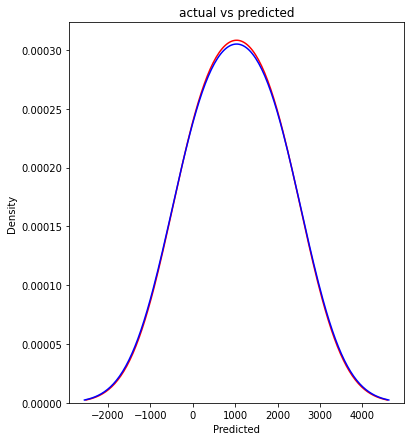

In [131]:
plt.figure(figsize=(6,7))

ax = sns.distplot(df_plot['Actual'],hist=False,color='r',label="Actual values")
sns.distplot(df_plot['Predicted'],hist=False,color='b', label='predicted values', ax=ax)

plt.title('actual vs predicted')

In [174]:
def Future_predict(email_data):
  email_data=[email_data]
  x_future=cv.transform(email_data)
  future_predict_data=spam_ham_detection.predict(x_future)
   
  if(future_predict_data==1):
    string="SPAM"
  elif(future_predict_data==0):
    string="HAM"

  bold_start = '\033[1m'
    

  def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)


  print(bold_start,colored(255,0,0, "The email is:"), bold_start,colored(0,255,0,string))

In [179]:
Future_predict('as registered optin subscriber ur draw gift voucher enter receipt correct ans whats bbc chart')

 The email is:   SPAM 
